## Analog Circuit Sizing With RNN-LSTM Model 

This Project is based on an article (https://doi.org/10.1145/3297156.3297160) which produced and compared an RNN-LSTM and a DNN model to determine an analog circuit sizing.

We implement the RNN-LSTM model and change some parameters and codes, due to improving performance, time consumption, and prediction of the model. 
Some settings which are modified, are dropout rate(because of overfitting problem), number of units (there is no need to increase), etc.

Besides, this paper was published at least three years ago and used old libraries. Owing to this reason we decided to write the code otherwise. 
Also, we implement two models with different windows and figure out the first one is better than the second one, not only for overfitting problem, but also for time consumption.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from   sklearn.preprocessing   import MinMaxScaler
from   sklearn.model_selection import train_test_split
from   keras.models            import Sequential
from   keras.layers            import Dense
from   keras.layers            import LSTM
from   keras.layers            import Dropout
from   keras.callbacks         import EarlyStopping
from   keras.models            import load_model

## Data Reading

In [3]:
data_path = '/content/norm_dataset_sorted_eucsqrt.csv'
labels = ['A0', 'GBW', 'PM', 'CMRR', 'PSRR']
data = pd.read_csv(data_path, header=None)
data.columns = labels
print(data.shape)

(9000, 5)


## Train and Test Splitting Function

In [7]:
def splitting(x1, window, test_size):
    X, Y = [], []

    for i in range(window, len(x1)):
        X.append(x1[i-window:i,:])
        Y.append(x1[i])

    X, Y = np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)

    
    return (*train_test_split(X, Y, test_size=test_size), X.shape)

## Model Making & Compiling

In [26]:
from keras.losses import mean_squared_error
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

def modeling(units, activation, input_shape, drop_rate, number_of_layers, optimizer, metrics, epochs, batch_size, x, y):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(drop_rate))
    for num in range(number_of_layers - 3):
        model.add(LSTM(units=units, activation=activation, return_sequences=True))
        model.add(Dropout(drop_rate))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dropout(drop_rate))
    model.add(Dense(units=5, activation=activation))


    model.compile(optimizer = optimizer, loss = root_mean_squared_error , metrics = metrics)
    es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)
    history = model.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks=[es], verbose=1)

    
    return history, model

## Scaling

In [27]:
s1 = MinMaxScaler(feature_range=(0,1))
x1 = s1.fit_transform(data)

## window sizes

In [28]:
 x_train1, x_test1, y_train1, y_test1, shape1 = splitting(x1, 3, .2)
 x_train2, x_test2, y_train2, y_test2, shape2 = splitting(x1, 30, .2)

modeling_params1 = 100, 'tanh', (shape1[1:]), .3, 3, 'adam', ['accuracy'], 170, 240, x_train1, y_train1
modeling_params2 = 100, 'tanh', (shape2[1:]), .3, 3, 'adam', ['accuracy'], 170, 240, x_train2, y_train2
print(x_train1.shape, y_train1.shape,x_train2.shape, y_train2.shape)
print(x_test1.shape, y_test1.shape, x_test2.shape, y_test2.shape)

(7197, 3, 5) (7197, 5) (7176, 30, 5) (7176, 5)
(1800, 3, 5) (1800, 5) (1794, 30, 5) (1794, 5)


In [29]:
history1, model1 = modeling(*modeling_params1)

Epoch 1/170
30/30 [==============================] - 5s 33ms/step - loss: 0.3235 - accuracy: 0.4093
Epoch 2/170
30/30 [==============================] - 1s 32ms/step - loss: 0.1597 - accuracy: 0.4903
Epoch 3/170
30/30 [==============================] - 1s 32ms/step - loss: 0.1231 - accuracy: 0.5818
Epoch 4/170
30/30 [==============================] - 1s 33ms/step - loss: 0.1091 - accuracy: 0.6942
Epoch 5/170
30/30 [==============================] - 1s 32ms/step - loss: 0.1008 - accuracy: 0.6990
Epoch 6/170
30/30 [==============================] - 1s 32ms/step - loss: 0.0972 - accuracy: 0.7022
Epoch 7/170
30/30 [==============================] - 1s 33ms/step - loss: 0.0935 - accuracy: 0.7070
Epoch 8/170
30/30 [==============================] - 1s 33ms/step - loss: 0.0914 - accuracy: 0.7135
Epoch 9/170
30/30 [==============================] - 1s 34ms/step - loss: 0.0894 - accuracy: 0.7229
Epoch 10/170
30/30 [==============================] - 1s 33ms/step - loss: 0.0873 - accuracy: 0.7218

In [30]:
#history1, model1 = modeling(*modeling_params1)
history2, model2 = modeling(*modeling_params2)

Epoch 1/170
30/30 [==============================] - 11s 235ms/step - loss: 0.2001 - accuracy: 0.5078
Epoch 2/170
30/30 [==============================] - 7s 228ms/step - loss: 0.1123 - accuracy: 0.6963
Epoch 3/170
30/30 [==============================] - 7s 226ms/step - loss: 0.0975 - accuracy: 0.7179
Epoch 4/170
30/30 [==============================] - 7s 229ms/step - loss: 0.0915 - accuracy: 0.7338
Epoch 5/170
30/30 [==============================] - 7s 230ms/step - loss: 0.0880 - accuracy: 0.7429
Epoch 6/170
30/30 [==============================] - 7s 229ms/step - loss: 0.0856 - accuracy: 0.7358
Epoch 7/170
30/30 [==============================] - 9s 297ms/step - loss: 0.0831 - accuracy: 0.7637
Epoch 8/170
30/30 [==============================] - 7s 228ms/step - loss: 0.0821 - accuracy: 0.7561
Epoch 9/170
30/30 [==============================] - 7s 243ms/step - loss: 0.0789 - accuracy: 0.7800
Epoch 10/170
30/30 [==============================] - 9s 289ms/step - loss: 0.0778 - accur

## ٍEvaluating

In [33]:
# Evaluation for the first model
model1.evaluate(x_train1, y_train1)
model1.evaluate(x_test1, y_test1)

57/57 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9111


[0.06301615387201309, 0.9111111164093018]

In [34]:
# Evaluation for the second model
model2.evaluate(x_train2, y_train2)
model2.evaluate(x_test2, y_test2)

57/57 [==============================] - 1s 17ms/step - loss: 0.0574 - accuracy: 0.9136


[0.05737179145216942, 0.9136009216308594]

## Predicting

In [35]:
# Make Prediction
testPredictScaled1 = model1.predict(x_test1)

# Invert Prediction
testPredict1 = s1.inverse_transform(testPredictScaled1)
y_test_main1 = s1.inverse_transform(y_test1)

In [36]:
# Make Prediction
testPredictScaled2 = model2.predict(x_test2)

# Invert Prediction
testPredict2 = s1.inverse_transform(testPredictScaled2)
y_test_main2 = s1.inverse_transform(y_test2)

## Plotting

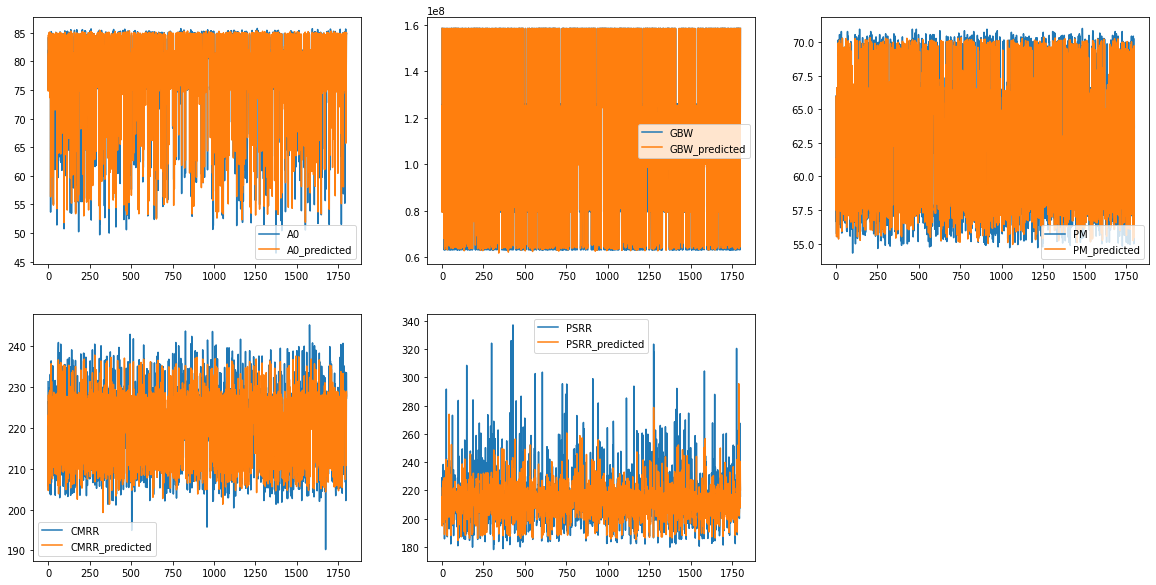

In [38]:
plt.figure(figsize=(20, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.plot(y_test_main1[:, i], label=labels[i])
    plt.plot(testPredict1[:, i], label=labels[i]+'_predicted')
    plt.legend()
plt.show()

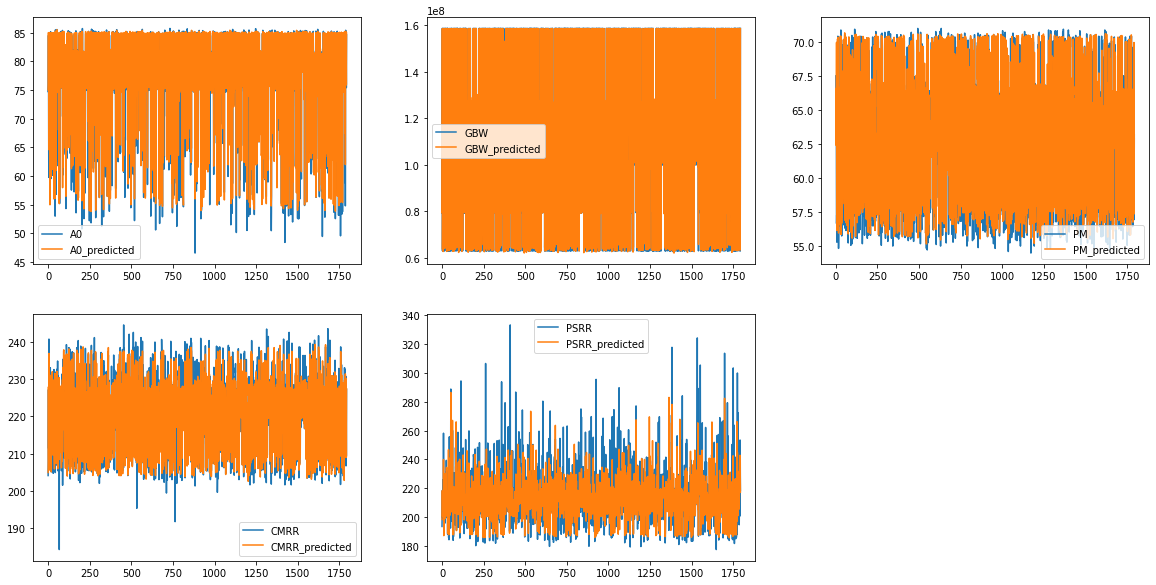

In [39]:
plt.figure(figsize=(20, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.plot(y_test_main2[:, i], label=labels[i])
    plt.plot(testPredict2[:, i], label=labels[i]+'_predicted')
    plt.legend()
plt.show()

Plotting differences between real data and predicted data 

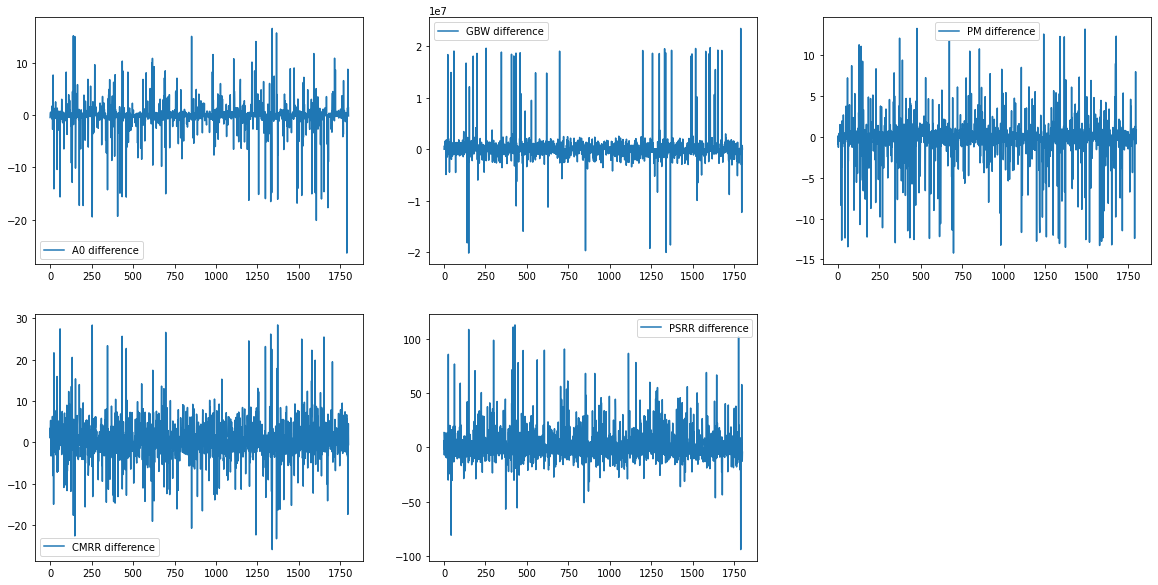

In [40]:
plt.figure(figsize=(20, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.plot(y_test_main1[:, i]-testPredict1[:, i], label=labels[i]+' difference')
    plt.legend()
plt.show()

Plot Loss

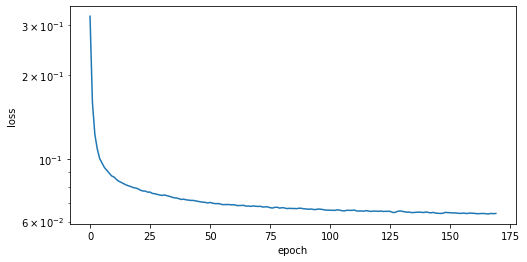

In [41]:
# Plot loss for the first model
plt.figure(figsize=(8,4))
plt.semilogy(history1.history['loss'])
plt.xlabel('epoch'); plt.ylabel('loss')
plt.savefig('loss.png')

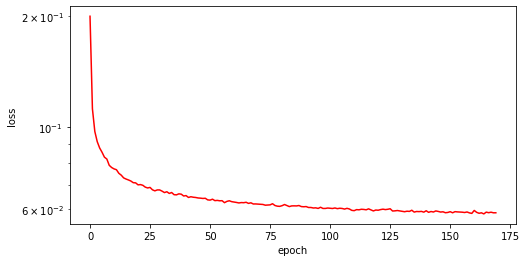

In [43]:
# Plot loss for the second model
plt.figure(figsize=(8,4))
plt.semilogy(history2.history['loss'], color = 'red')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.savefig('loss.png')

# Group Members

Reza Shafaghi

Mahshid Marashi

Maryam Maleki

We will appreciate, if you give us your feedback.

Thank you for your support and consideration.

Best Regards,
Group Members